In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\kkksk\\Development\\Python Study\\DeepLearning\\HW_pytorch_practice1'

In [3]:
df = pd.read_csv("native_plant_richness.txt", sep = '\t')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ntv_rich  22 non-null     float64
 1   area      22 non-null     float64
dtypes: float64(2)
memory usage: 480.0 bytes
None


In [5]:
print(df.head())

   ntv_rich      area
0  1.897627  1.602060
1  1.633468  0.477121
2  2.597695  3.432488
3  2.238046  1.785330
4  2.712650  3.075547


In [6]:
x = df['area']
y = df['ntv_rich']

print(df.ntv_rich.head())
print(df['ntv_rich'].head())

0    1.897627
1    1.633468
2    2.597695
3    2.238046
4    2.712650
Name: ntv_rich, dtype: float64
0    1.897627
1    1.633468
2    2.597695
3    2.238046
4    2.712650
Name: ntv_rich, dtype: float64


In [7]:
xbar = x.mean()
ybar = y.mean()
s_xy = ((x-xbar)*(y-ybar)).sum()
s_xx = ((x-xbar)**2).sum()
a = s_xy/s_xx
b = ybar-a*xbar
print('a = ', round(a,4))
print('b = ', round(b,4))

a =  0.3557
b =  1.336


In [8]:
x_0 = 2
predicted = a*x_0 + b
print('prediction = ', round(predicted,4))

prediction =  2.0475


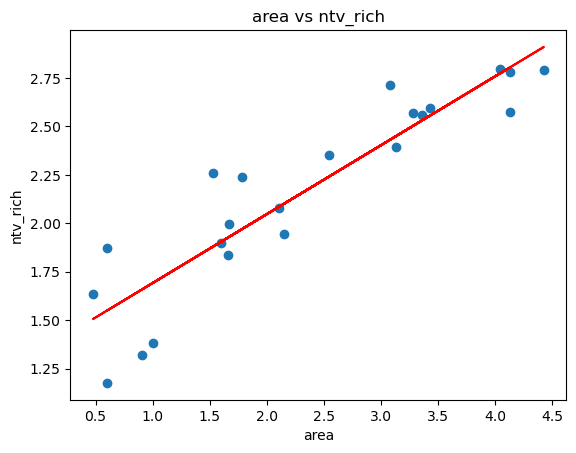

In [9]:
plt.title('area vs ntv_rich')
plt.scatter(df['area'],df['ntv_rich'])
plt.plot(df['area'],a*df['area'] +b, color = 'red')
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

 - statsmodels 패키지를 사용한 구현

In [10]:
from statsmodels.formula.api import ols

In [11]:
df = pd.read_csv("native_plant_richness.txt", sep = '\t')

In [12]:
model = ols('ntv_rich ~ area', data = df)

In [13]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               ntv_rich   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     96.13
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           4.40e-09
Time:                        15:41:40   Log-Likelihood:                 4.0471
No. Observations:                  22   AIC:                            -4.094
Df Residuals:                      20   BIC:                            -1.912
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3360      0.096     13.869      0.0

In [14]:
result.params

Intercept    1.336048
area         0.355739
dtype: float64

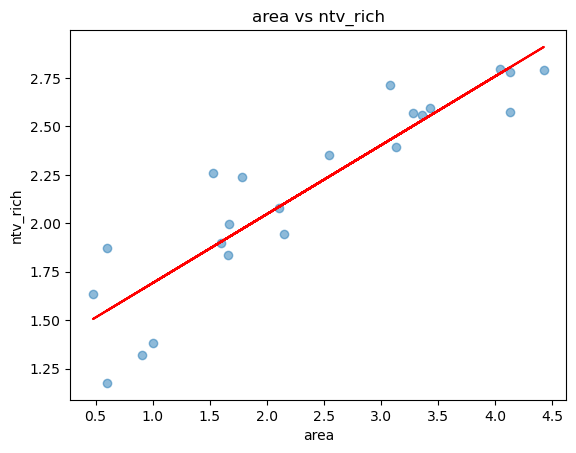

In [15]:
plt.title('area vs ntv_rich')
y = df.ntv_rich
x = df.area
plt.scatter(x, y, alpha = 0.5)
plt.plot(x, result.params[1]*df['area']+result.params[0], color = 'red')
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

 - 파이토치 이용한 회귀계수 직접 구현

In [16]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
df = pd.read_csv("native_plant_richness.txt", sep = '\t')
x = torch.tensor(df['area']).to(device)
y = torch.tensor(df['ntv_rich']).to(device)

In [17]:
xbar = x.mean()
ybar = y.mean()
s_xy = ((x-xbar)*(y-ybar)).sum()
s_xx = ((x-xbar)**2).sum()
a = s_xy/s_xx
b = ybar-a*xbar
print('slope = ', a)
print('intercept = ', b)

slope =  tensor(0.3557, dtype=torch.float64)
intercept =  tensor(1.3360, dtype=torch.float64)


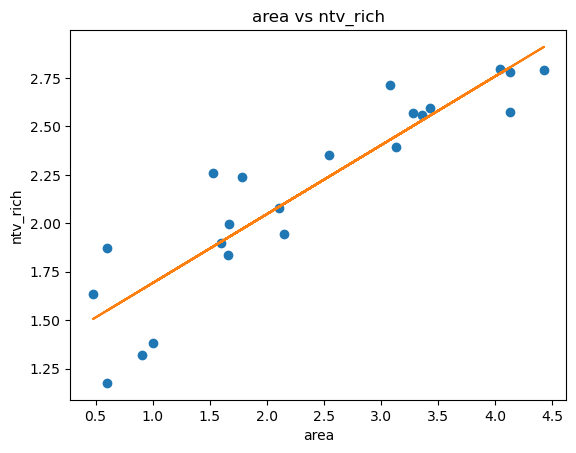

In [18]:
plt.title('area vs ntv_rich')
plt.plot(x.cpu().numpy(), y.cpu().numpy(),'o')
plt.plot(x.cpu().numpy(), a.cpu().numpy()*x.cpu().numpy() + b.cpu().numpy())
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

 - 머신러닝 기반 회귀분석 파이토치 구현

In [19]:
import torch
w = torch.tensor(2.0, requires_grad = True)

x = w + 2
y = x**2
z = 3*y + 5
print('w.grad_fn =', w.grad_fn)
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)
print('z =', z, ', requires_grad =', z.requires_grad)

w.grad_fn = None
x = tensor(4., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(16., grad_fn=<PowBackward0>) , requires_grad = True
z = tensor(53., grad_fn=<AddBackward0>) , requires_grad = True


In [20]:
w = torch.tensor(2.0, requires_grad = True)

for i in range(10):
  x = w + 2
  y = x**2
  z = 3*y + 5
  z.backward()
print(f'z를 w로 미분한 값: {w.grad}')

z를 w로 미분한 값: 240.0


In [21]:
a = torch.tensor(2., requires_grad = True)
b = torch.tensor(3., requires_grad = True)
x = a+b
y = a*b
print('Before detach()')
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

x = x.detach()
y = y.detach()
print('After detach()')
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

Before detach()
x = tensor(5., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(6., grad_fn=<MulBackward0>) , requires_grad = True
After detach()
x = tensor(5.) , requires_grad = False
y = tensor(6.) , requires_grad = False


In [22]:
a = torch.tensor(2., requires_grad = True)
b = torch.tensor(3., requires_grad = True)
x = a+b
y = a*b
print('Before torch.no_grad()')
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

with torch.no_grad():
  x = a+b
  y = a*b
print('After torch.no_grad()') 
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)

Before torch.no_grad()
x = tensor(5., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(6., grad_fn=<MulBackward0>) , requires_grad = True
After torch.no_grad()
x = tensor(5.) , requires_grad = False
y = tensor(6.) , requires_grad = False


In [23]:
w = torch.tensor(2.0, requires_grad = True)

x = w+2
y = x**2
y = y.detach()
z = 3*y + 5
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)
print('z =', z, ', requires_grad =', z.requires_grad)
z.backward()
print(f'z를 w로 미분한 값 : {w.grad}')

x = tensor(4., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(16.) , requires_grad = False
z = tensor(53.) , requires_grad = False


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
w = torch.tensor(2.0, requires_grad = True)

x = w+2
with torch.no_grad():
  y = x**2
  z = 3*y + 5
print('x =', x, ', requires_grad =', x.requires_grad)
print('y =', y, ', requires_grad =', y.requires_grad)
print('z =', z, ', requires_grad =', z.requires_grad)
z.backward()
print(f'z를 w로 미분한 값 : {w.grad}')

x = tensor(4., grad_fn=<AddBackward0>) , requires_grad = True
y = tensor(16.) , requires_grad = False
z = tensor(53.) , requires_grad = False


RuntimeError: ignored

 - 파이토치 미분값 초기화 방법

In [ ]:
x = torch.tensor(2.0, requires_grad = True)

n_epochs = 10
for epoch in range(n_epochs + 1):

  y = 2*x
  y.backward()
  print('dy/dx = {}'.format(x.grad))


dy/dx = 2.0
dy/dx = 4.0
dy/dx = 6.0
dy/dx = 8.0
dy/dx = 10.0
dy/dx = 12.0
dy/dx = 14.0
dy/dx = 16.0
dy/dx = 18.0
dy/dx = 20.0
dy/dx = 22.0


In [ ]:
x = torch.tensor(2.0, requires_grad = True)

n_epochs = 10
for epoch in range(n_epochs + 1):

  y = 2*x
  y.backward()
  print('dy/dx = {}'.format(x.grad))
  x.grad.zero_()

dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0
dy/dx = 2.0


In [ ]:
#Loss function: 파이토치 자동미분과 직접미분 값 비교

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# 모델 초기화
a = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

lr = 1e-1
n_epochs = 3
for epoch in range(n_epochs):
  yhat = a * x_train + b
  error = y_train - yhat
  loss = (error**2).mean()
  loss.backward()
  a_grad = -2 * (x_train*error).mean()
  b_grad = -2 * error.mean()
  print('epoch =', epoch)
  print('직접미분 a_grad =', a_grad)
  print('직접미분 b_grad =', b_grad)
  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad

  print('자동미분 a.grad =', a.grad)
  print('자동미분 b.grad =', b.grad)

epoch = 0
직접미분 a_grad = tensor(-18.6667, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(-8., grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-18.6667])
자동미분 b.grad = tensor([-8.])
epoch = 1
직접미분 a_grad = tensor(1.9556, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(1.0667, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-16.7111])
자동미분 b.grad = tensor([-6.9333])
epoch = 2
직접미분 a_grad = tensor(20.3259, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(9.1378, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([3.6148])
자동미분 b.grad = tensor([2.2044])


In [ ]:
#Loss function: 파이토치 자동미분과 직접미분 값 비교

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# 모델 초기화
a = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

lr = 1e-1
n_epochs = 3
for epoch in range(n_epochs):
  yhat = a * x_train + b
  error = y_train - yhat
  loss = (error**2).mean()
  loss.backward()
  a_grad = -2 * (x_train*error).mean()
  b_grad = -2 * error.mean()
  print('epoch =', epoch)
  print('직접미분 a_grad =', a_grad)
  print('직접미분 b_grad =', b_grad)
  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad

  print('자동미분 a.grad =', a.grad)
  print('자동미분 b.grad =', b.grad)
  
  #zero 사용
  a.grad.zero_()
  b.grad.zero_()

epoch = 0
직접미분 a_grad = tensor(-18.6667, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(-8., grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-18.6667])
자동미분 b.grad = tensor([-8.])
epoch = 1
직접미분 a_grad = tensor(1.9556, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(1.0667, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([1.9556])
자동미분 b.grad = tensor([1.0667])
epoch = 2
직접미분 a_grad = tensor(-0.2963, grad_fn=<MulBackward0>)
직접미분 b_grad = tensor(0.0711, grad_fn=<MulBackward0>)
자동미분 a.grad = tensor([-0.2963])
자동미분 b.grad = tensor([0.0711])


In [ ]:
import torch.optim as optim

x_tensor = torch.FloatTensor([[1],[2],[3]])
y_tensor = torch.FloatTensor([[2],[4],[6]])

a = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

lr = 0.1
optimizer = optim.SGD([a,b], lr = lr)

n_epochs = 100
for epoch in range(n_epochs):
  yhat = a + b * x_tensor
  error = y_tensor - yhat
  loss = (error**2).mean()
  loss.backward()

  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad
  optimizer.zero_grad()
  optimizer.step()

  if epoch % 10 ==0:
    print('epoch = {:3d}/{} a = {:.3f}, b = {:.3f}, Loss ={:.5f}'.format(
        epoch, n_epochs, a.item(), b.item(), loss.item()
    ))

epoch =   0/100 a = 0.800, b = 1.867, Loss =18.66667
epoch =  10/100 a = 0.564, b = 1.752, Loss =0.04792
epoch =  20/100 a = 0.442, b = 1.805, Loss =0.02945
epoch =  30/100 a = 0.347, b = 1.847, Loss =0.01810
epoch =  40/100 a = 0.272, b = 1.880, Loss =0.01113
epoch =  50/100 a = 0.213, b = 1.906, Loss =0.00684
epoch =  60/100 a = 0.167, b = 1.927, Loss =0.00420
epoch =  70/100 a = 0.131, b = 1.942, Loss =0.00258
epoch =  80/100 a = 0.103, b = 1.955, Loss =0.00159
epoch =  90/100 a = 0.081, b = 1.965, Loss =0.00098


예제 3.2) 파이썬 scikit-learn을 이용한 머신러닝

In [ ]:
import numpy as np
x = [1,2,3,4,5]
y = [0, 1.1, 1.8, 3.1, 4.5]
X = np.array(x).reshape(-1,1)
Y = np.array(y)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
print('intercept =', round(model.intercept_,4))
print('slope =', model.coef_)

intercept = -1.2
slope = [1.1]


In [ ]:
y_pred = model.predict(X)
print('prediction = ', y_pred)

prediction =  [-0.1  1.   2.1  3.2  4.3]


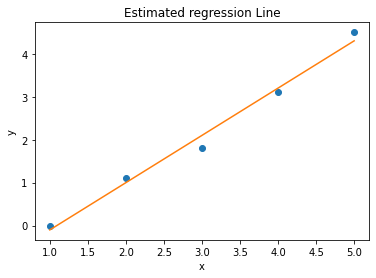

In [ ]:
plt.title('Estimated regression Line')
plt.plot(x,y,'o')
plt.plot(x,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

예제 3.2) 파이토치 이용 머신러닝

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.tensor([1, 2, 3, 4, 5]).to(device)
y = torch.tensor([0, 1.1, 1.8, 3.1, 4.5]).to(device)

torch.manual_seed(1)
a = torch.randn(1, device = device, requires_grad = True)
b = torch.randn(1, device = device, requires_grad = True)

def model(x):
  return a * x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
for epoch in range(epochs):
  yhat = model(x).to(device)

  loss = (yhat - y).pow(2).mean()
  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1) % 100 == 0:
    print('epoch=',epoch+1,'a=',a.detach().cpu().numpy(), 'b=',b.detach().cpu().numpy(),
          'loss=',loss.detach().cpu().numpy())

epoch= 100 a= [0.80877024] b= [-0.1485682] loss= 0.23458958
epoch= 200 a= [0.8924352] b= [-0.45062518] loss= 0.13490887
epoch= 300 a= [0.9520648] b= [-0.6659069] loss= 0.08427431
epoch= 400 a= [0.9945639] b= [-0.8193421] loss= 0.058553673
epoch= 500 a= [1.0248537] b= [-0.92869824] loss= 0.045488335
epoch= 600 a= [1.0464419] b= [-1.0066384] loss= 0.03885163
epoch= 700 a= [1.0618281] b= [-1.0621874] loss= 0.03548041
epoch= 800 a= [1.0727941] b= [-1.1017781] loss= 0.03376796
epoch= 900 a= [1.08061] b= [-1.1299958] loss= 0.032898042
epoch= 1000 a= [1.0861804] b= [-1.150107] loss= 0.032456223
epoch= 1100 a= [1.0901505] b= [-1.1644404] loss= 0.032231778
epoch= 1200 a= [1.0929803] b= [-1.1746565] loss= 0.03211769
epoch= 1300 a= [1.0949969] b= [-1.1819377] loss= 0.032059755
epoch= 1400 a= [1.0964342] b= [-1.1871265] loss= 0.032030366
epoch= 1500 a= [1.0974585] b= [-1.1908245] loss= 0.03201545
epoch= 1600 a= [1.0981885] b= [-1.1934601] loss= 0.032007847
epoch= 1700 a= [1.0987087] b= [-1.1953384

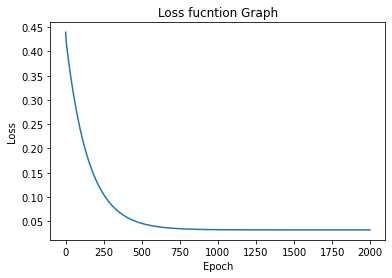

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.tensor([1, 2, 3, 4, 5]).to(device)
y = torch.tensor([0, 1.1, 1.8, 3.1, 4.5]).to(device)

torch.manual_seed(1)
a = torch.randn(1, device = device, requires_grad = True)
b = torch.randn(1, device = device, requires_grad = True)

def model(x):
  return a * x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
loss_list = []

for epoch in range(epochs):
  yhat = model(x).to(device)
  loss = (yhat - y).pow(2).mean()
  loss.backward()
  loss_list.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()


plt.title('Loss fucntion Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(0, epochs, 1),loss_list)

예제 3.3) scikit-learn

In [ ]:
df = pd.read_csv('native_plant_richness.txt',sep='\t')
print(df.head())

   ntv_rich      area
0  1.897627  1.602060
1  1.633468  0.477121
2  2.597695  3.432488
3  2.238046  1.785330
4  2.712650  3.075547


In [ ]:
y = df['ntv_rich']
x = df['area']
print(y.shape)
print(x.shape)
X=x.values.reshape(-1,1)
print(X.shape)

(22,)
(22,)
(22, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)


LinearRegression()

In [ ]:
print('intercept:{:.4f}'.format(regressor.intercept_))
print('Coefficient:{:.4f}'.format(regressor.coef_[0]))

intercept:1.3360
Coefficient:0.3557


In [ ]:
x_0 = 2
prediction = regressor.predict([[x_0]])
print('prediction:{:.4f}'.format(prediction[0]))

prediction:2.0475


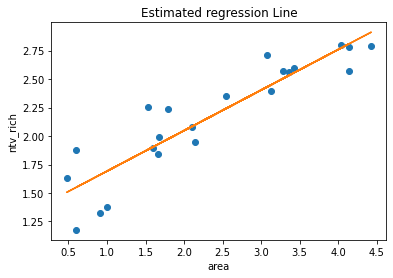

In [ ]:
plt.title('Estimated regression Line')
plt.plot(X, y, 'o')
plt.plot(X, regressor.predict(X))
plt.xlabel('area')
plt.ylabel('ntv_rich')
plt.show()

예제3.3) pytorch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv('native_plant_richness.txt',sep='\t')

x = torch.tensor(df['area']).to(device)
y = torch.tensor(df['ntv_rich']).to(device)

a = torch.tensor(1., device = device, requires_grad = True)
b = torch.tensor(1., device = device, requires_grad = True)

def model(x):
  return a*x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
for epoch in range(epochs):
  yhat = model(x).to(device)
  loss = (yhat -y).pow(2).mean()
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  if (epoch + 1) % 100 == 0:
    print('epoch=',epoch+1,'a=',a.detach().cpu().numpy(), 'b=',b.detach().cpu().numpy(),
          'loss=',loss.detach().cpu().numpy()) 

epoch= 100 a= 0.47096312 b= 0.99962604 loss= 0.06550635093768799
epoch= 200 a= 0.43353823 b= 1.1088966 loss= 0.0519147393285402
epoch= 300 a= 0.408269 b= 1.182676 loss= 0.045718412762104865
epoch= 400 a= 0.39120725 b= 1.2324917 loss= 0.042893555822939196
epoch= 500 a= 0.37968713 b= 1.2661272 loss= 0.041605722956125864
epoch= 600 a= 0.37190875 b= 1.288838 loss= 0.041018608549832615
epoch= 700 a= 0.36665684 b= 1.3041722 loss= 0.040750952614521774
epoch= 800 a= 0.36311063 b= 1.3145261 loss= 0.04062892718942061
epoch= 900 a= 0.36071637 b= 1.3215168 loss= 0.040573300898233314
epoch= 1000 a= 0.35909975 b= 1.3262368 loss= 0.040547941236051425
epoch= 1100 a= 0.3580083 b= 1.3294235 loss= 0.040536381230253514
epoch= 1200 a= 0.35727137 b= 1.3315752 loss= 0.04053111108342023
epoch= 1300 a= 0.35677376 b= 1.3330281 loss= 0.0405287081689833
epoch= 1400 a= 0.3564377 b= 1.3340093 loss= 0.04052761248296974
epoch= 1500 a= 0.35621083 b= 1.3346717 loss= 0.040527113109224425
epoch= 1600 a= 0.3560577 b= 1.33

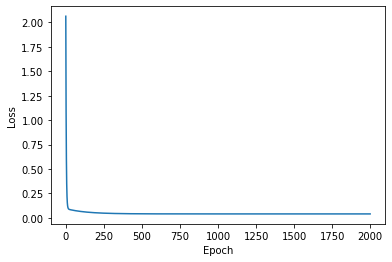

In [ ]:

df = pd.read_csv('native_plant_richness.txt',sep='\t')

x = torch.tensor(df['area'])
y = torch.tensor(df['ntv_rich'])

a = torch.tensor(1., requires_grad = True)
b = torch.tensor(1., requires_grad = True)

def model(x):
  return a*x + b

learning_rate = 0.01
optimizer = optim.SGD([a,b],lr = learning_rate)

epochs = 2000
loss_list = []

for epoch in range(epochs):
  yhat = model(x)

  loss = (yhat -y).pow(2).mean()
  loss.backward()
  loss_list.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(0, epochs, 1),loss_list)

예제 3.4) scikit-learn

In [ ]:
df = pd.read_csv('student_scores.csv')
print(df.shape)

(25, 2)


In [ ]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, 1]
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:, 1].to_numpy()
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25, 1)
(25,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercept:{:.4f}'.format(model.intercept_))
print('Coefficient:{:.4f}'.format(model.coef_[0]))

Intercept:2.0182
Coefficient:9.9107


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

print('MAE:{:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE:{:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('MAE:{:.4f}'.format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print('R2:{:.4f}'.format(r2_score(y_test, y_pred)))

MAE:4.1839
MSE:21.5988
MAE:2.0454
R2:0.9455


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv('student_scores.csv')

X = torch.tensor(df['Hours']).to(device)
y = torch.tensor(df['Scores']).to(device)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

a = torch.tensor(1.,device=device, requires_grad=True)
b = torch.tensor(1.,device=device, requires_grad=True)

def model(x):
    return a * x + b

learning_rate = 0.01
optimizer = torch.optim.SGD([a,b],lr=learning_rate)

epochs=1000
for epoch in range(epochs):
    yhat = model(X_train).to(device)

    loss = (yhat - y_train).pow(2).mean()
    loss.backward()
    
    optimizer.step()    
    optimizer.zero_grad()    
    # Print the progress
    if (epoch+1) % 100 == 0:
        print('epoch=',epoch+1,'a=',a.detach().cpu().numpy(),'b=',b.detach().cpu().numpy(),
              'loss=',loss.detach().cpu().numpy())

epoch= 100 a= 9.870372 b= 2.2753692 loss= 30.910423487383525
epoch= 200 a= 9.88253 b= 2.1977417 loss= 30.90414959521733
epoch= 300 a= 9.891019 b= 2.1435425 loss= 30.901091230976157
epoch= 400 a= 9.896946 b= 2.105701 loss= 30.89960035343364
epoch= 500 a= 9.901083 b= 2.0792816 loss= 30.898873626889348
epoch= 600 a= 9.903973 b= 2.060835 loss= 30.898519346501235
epoch= 700 a= 9.90599 b= 2.0479565 loss= 30.89834665373413
epoch= 800 a= 9.907398 b= 2.038964 loss= 30.89826245992996
epoch= 900 a= 9.908381 b= 2.032685 loss= 30.89822141393456
epoch= 1000 a= 9.909068 b= 2.0283015 loss= 30.898201407587248


In [ ]:
y_pred = model(X_test).to(device)
print(y_pred)
y_test = [y_test[x].item() for x in range(len(y_test))]
print(y_test)
y_pred = [y_pred[x].item() for x in range(len(y_pred))]
print(y_pred)

tensor([16.8919, 33.7373, 75.3554, 26.8010, 60.4918], dtype=torch.float64,
       grad_fn=<AddBackward0>)
[20, 27, 69, 30, 62]
[16.89190363883972, 33.73731942176819, 75.35540547370911, 26.800971746444702, 60.49180331230164]


In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)

   Actual  Predicted
0      20  16.891904
1      27  33.737319
2      69  75.355405
3      30  26.800972
4      62  60.491803


In [ ]:
print('MAE:{:.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE:{:.4f}'.format(mean_squared_error(y_test,y_pred)))
print('MAE:{:.4f}'.format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print('R2:{:.4f}'.format(r2_score(y_test, y_pred)))

MAE:4.1816
MSE:21.5903
MAE:2.0449
R2:0.9455


<Axes: >

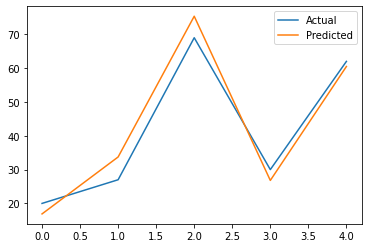

In [ ]:
df.plot()